In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [89]:
# retrieve the CSV data from my computer and create a pandas data frame
TEDSA = pd.read_csv('''/Users/Kate/Desktop/Python for Everybody Specialization/Course 5 - Capstone/Weeks 3, 5, 7 - Side project/TEDSA_2015_PUF.csv''')

In [90]:
# input the data into a SQL database
connection = sqlite3.connect("SIDEPROJECT.sqlite")  
cur = connection.cursor()  

In [91]:
TEDSA.to_sql(name="TEDSA", con=connection) #, if_exists="append", index=False) 

In [92]:
# now we have a sql database, we can delete the TEDSA dataframe to free up memory
del(TEDSA)

In [198]:
# create dictionaries for the numerical coding of data from SAMHDA data source
State_dict = {1:"Alabama",2:"Alaska", 4:"Arizona", 5:"Arkansas", 6:"California", 8:"Colorado", 9:"Connecticut",
             10:"Delaware", 11: "District of Columbia", 12: "Florida", 15:"Hawaii", 16:"Idaho", 17:"Illinois",
             18:"Indiana", 19:"Iowa", 21:"Kentucky", 22:"Louisiana", 23:"Maine", 24:"Maryland", 25:"Massachusetts",
             26: "Michigan", 27:"Minnesota", 28:"Mississippi", 29:"Missouri", 30:"Montana", 31:"Nebraska", 
             32:"Nevada", 33:"New Hampshire", 34:"New Jersey", 35:"New Mexico", 36:"New York", 37:"North Carolina",
             38:"North Dakota", 39:"Ohio", 40:"Oklahoma", 44:"Rhode Island", 46:"South Dakota", 47:"Tennessee",
             48:"Texas", 49:"Utah", 50:"Vermont", 51:"Virginia", 53:"Washington", 54:"West Virginia", 55:"Wisconsin",
             56: "Wyoming", 72:"Puerto Rico"}

In [199]:
cur.execute("SELECT REGION,STFIPS,COUNT(CASEID) from TEDSA group by REGION,STFIPS")

In [200]:
state_table_with_codes = cur.fetchall()

In [201]:
# make region-to-color code dictionary

region_color = {0:'black', 1:'blue', 2:'red', 3:'green', 4:'cyan'}

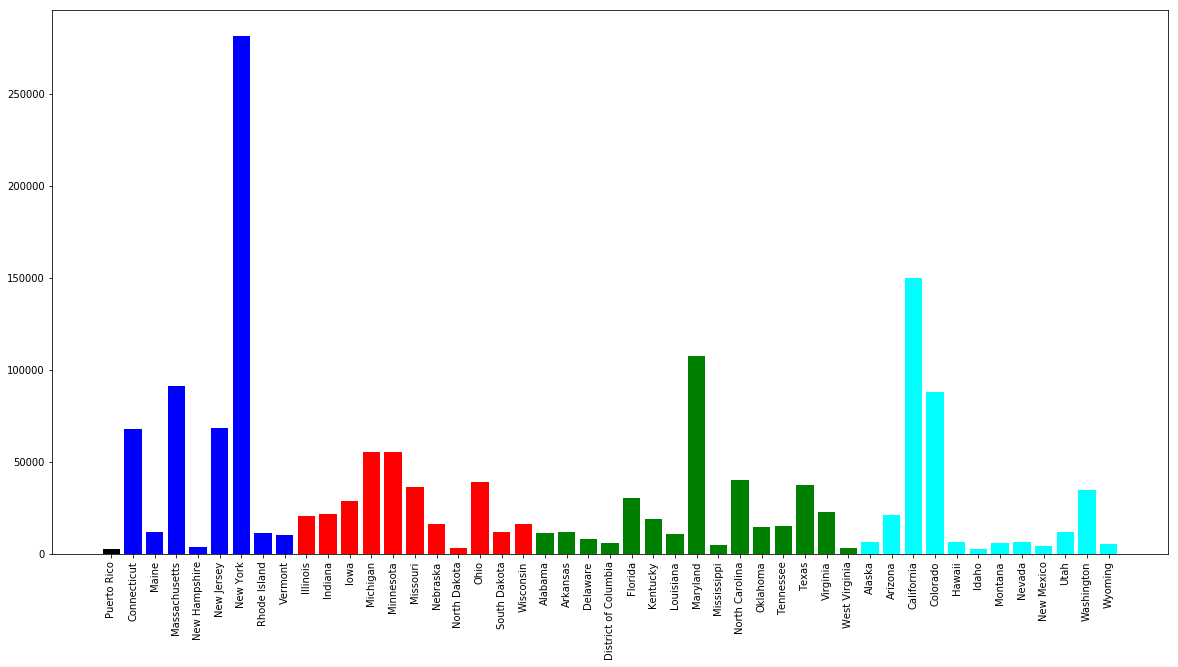

In [209]:
colors = list()
states = list()
episodes = list()
for entry in state_table_with_codes:
    colors.append(region_color[entry[0]])
    states.append(State_dict[entry[1]])
    episodes.append(entry[2])
    
%matplotlib inline

plt.figure(figsize=(20,10))
plt.bar(states, episodes, color=colors)
plt.xticks(rotation=90);

In [203]:
# retrieve US census state populations as CSV data from my computer and create a pandas data frame
STATEPOPS = pd.read_csv("/Users/Kate/Desktop/Python for Everybody Specialization/Course 5 - Capstone/Weeks 3, 5, 7 - Side project/STATE POPULATIONS.csv")

In [210]:
STATEPOPS.to_sql(name="STATEPOPS", con=connection) ;

ValueError: Table 'STATEPOPS' already exists.

In [205]:
cur.execute("SELECT STATE, POPULATION from STATEPOPS")

In [206]:
STATEPOPSdict=dict()
for (state, pop) in STATEPOPSlist:
    STATEPOPSdict[state]=pop
    


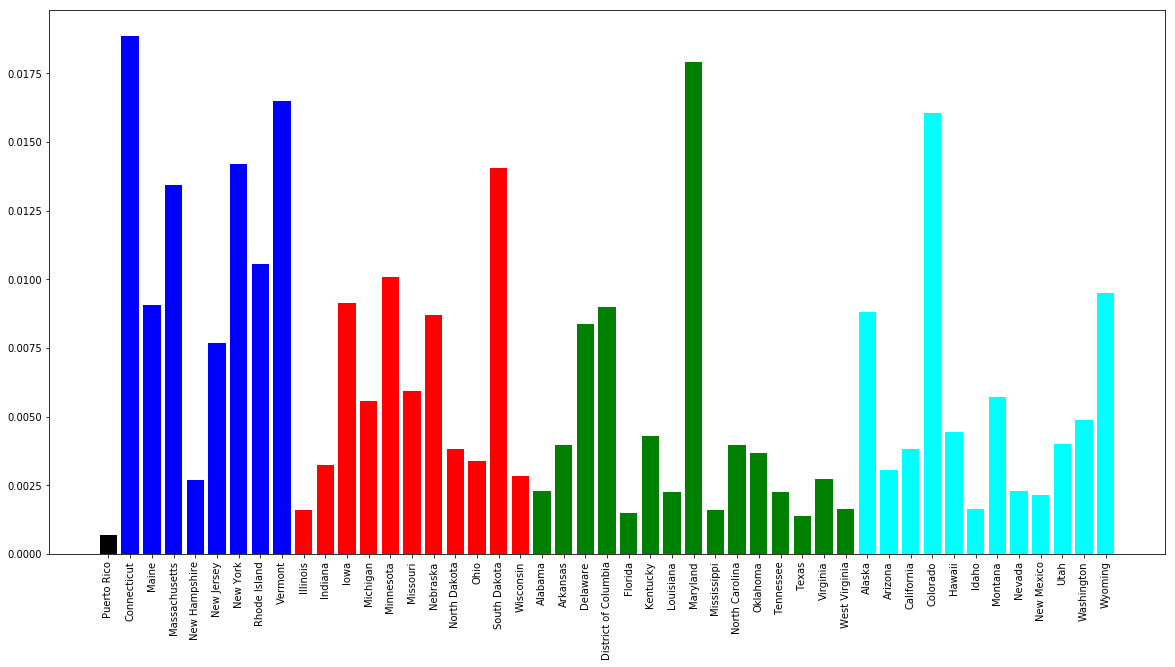

In [211]:
colors = list()
states = list()
per_capita_episodes = list()

for entry in state_table_with_codes: 
    colors.append(region_color[entry[0]])
    states.append(State_dict[entry[1]])
    per_capita_episodes.append(entry[2]/STATEPOPSdict[State_dict[entry[1]]])
                                                      
%matplotlib inline

plt.figure(figsize=(20,10))
plt.bar(states, per_capita_episodes, color=colors)
plt.xticks(rotation=90);


NameError: name 'population' is not defined